## Pump It Up 

Team project by Mariia Makarova and Rustam Guseynzade

## Problem Description and Goal

Tanzanian people have poor access to clean drinking water, which makes them to drink dirty water, and walk a lot to the closest functional water pump. Due to Tanzanian government's failure to fix this problem a big amount of water pumps are completely non-functioning or barely functional and also needing in repairing.



This is important task to solve, because our model can help Tanzanian government:

*   to save money and time, and also think over the matter by providing the list of possible future non-working pumps.
*   to predict which pumps are functional, which need some repairs, and which don't work at all.
*   reduce the cost on workers, who have to drive and inspect every water pump in Tanzania.
*   improve maintanance operations.
*   understand if clean potable water is avaivable to Tanzanian habitants.




Provided features are:

*   **amount_tsh** - Total static head (amount water available to waterpoint)
*   **date_recorded** - The date the row was entered
*   **funder** - Who funded the well
*   **gps_height** - Altitude of the well
*   **installer** - Organization that installed the well
*   **longitude** - GPS coordinate
*   **latitude** - GPS coordinate
*   **wpt_name** - Name of the waterpoint if there is one
*   **num_private** - Private number
*   **basin** - Geographic water basin
*   **subvillage** - Geographic location
*   **region** - Geographic location
*   **region_code** - Geographic location (coded)
*   **district_code** - Geographic location (coded)
*   **lga** - Geographic location
*   **ward** - Geographic location
*   **population** - Population around the well
*   **public_meeting** - True/False
*   **recorded_by** - Group entering this row of data
*   **scheme_management** - Who operates the waterpoint
*   **scheme_name** - Who operates the waterpoint
*   **permit** - If the waterpoint is permitted
*   **construction_year** - Year the waterpoint was constructed
*   **extraction_type** - The kind of extraction the waterpoint uses
*   **extraction_type_group** - The kind of extraction the waterpoint uses
*   **management** - How the waterpoint is managed
*   **management_group** - How the waterpoint is managed
*   **payment** - What the water costs
*   **payment_type** - What the water costs
*   **water_quality** - The quality of the water
*   **quality_group** - The quality of the water
*   **quantity** - The quantity of water
*   **quantity_group** - The quantity of water
*   **source** - The source of the water
*   **source_type** - The source of the water
*   **source_class** - The source of the water
*   **waterpoint_type** - The kind of waterpoint
*   **waterpoint_type_group** - The kind of waterpoint

## Import libraries

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data loading

In [114]:
#  from google.colab import drive
#  drive.mount('/content/drive', force_remount=True)

In [168]:
# Load the data
path = 'drive/MyDrive/Colab Notebooks/Pumpitupproject/'
submission_format_filename = path + "SubmissionFormat.csv"
test_set_values_filename = path + "702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv"
train_set_labels_filename = path + "0bf8bc6e-30d0-4c50-956a-603fc693d966.csv"
train_set_values_filename = path + "4910797b-ee55-40a7-8668-10efd5c1b960.csv"

submission_format_df = pd.read_csv(submission_format_filename, index_col=0)
test_set_values_df = pd.read_csv(test_set_values_filename, index_col=0)
train_set_labels_df = pd.read_csv(train_set_labels_filename, index_col=0)
train_set_values_df = pd.read_csv(train_set_values_filename, index_col=0)

Merging two dataframes (train test values and train set labels) into one dataframe (data).

In [169]:
data = pd.merge(train_set_values_df, train_set_labels_df, on='id')
test_data = test_set_values_df
origin_data = data
del train_set_labels_df

Investigating first 3 rows of our data.

In [170]:
data.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [171]:
# Let's count the number of rows and columns in our data and test_data
(data.shape, test_data.shape)

((59400, 40), (14850, 39))

In [172]:
# Let's check if we have NaNs in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [173]:
dummy_columns = []
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print ('Categorical features: ',categorical_columns)
print ('Numerical features: ',numerical_columns)

Categorical features:  ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
Numerical features:  ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


## Prepare the data

Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. (7 points)

*Handling missing values, encoding categorical variables, generating new features*

In [174]:
# Check for nulls.
data.apply(lambda x: sum(x.isnull()))

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Column 'funder'

In [175]:
data.funder.value_counts()

Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                           ... 
Thomasi Busigaye              1
Said Omari                    1
Otelo Bussiness Company       1
Doner And Ded                 1
Cvs Miss                      1
Name: funder, Length: 1897, dtype: int64

In [176]:
funder_counts = data.funder.value_counts()
considered_funders = [funder_counts.index[index[0]] for index in
 list(filter(lambda s: s[1] > 1000, [(i, funder_counts[i]) for i in range(len(funder_counts))]))]

def reduce_funder(x):
  if x.funder in considered_funders:
    return x.funder
  else:
    return 'other'
    
data.funder = data.apply(lambda x: reduce_funder(x), axis=1)
test_data.funder = test_data.apply(lambda x: reduce_funder(x), axis=1)
dummy_columns.append('funder')

data.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

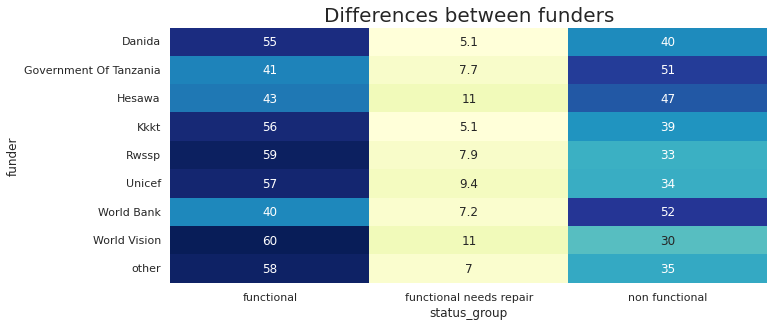

In [177]:
# To check differences between the different funders.
sns.set(rc={'figure.figsize':(10.7,4.7)})

ax = sns.heatmap(pd.crosstab(data.funder, data.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between funders', fontsize = 20) 
plt.show()

Column 'installer'

In [178]:
data.installer.value_counts()

DWE                 17402
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
BAPTIST CHURCH          1
Aqual                   1
ANGLIKANA CHURCH        1
FIDA                    1
Petro Patrice           1
Name: installer, Length: 2145, dtype: int64

In [179]:
installer_counts = data.installer.value_counts()
considered_installers = [installer_counts.index[index[0]] for index in
 list(filter(lambda s: s[1] > 1000, [(i, installer_counts[i]) for i in range(len(installer_counts))]))]

def reduce_installer(x):
  if x.installer in considered_installers:
    return x.installer
  else:
    return 'other'
    
data.installer = data.apply(lambda x: reduce_installer(x), axis=1)
test_data.installer = test_data.apply(lambda x: reduce_installer(x), axis=1)
dummy_columns.append('installer')

data.installer.value_counts()

other         36857
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

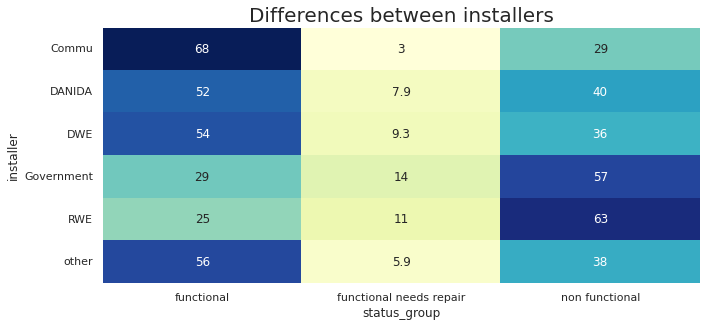

In [180]:
# To check differences between the different installers.
sns.set(rc={'figure.figsize':(10.7,4.7)})

ax = sns.heatmap(pd.crosstab(data.installer, data.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between installers', fontsize = 20) 

plt.show()

Column 'subvillage'

In [181]:
# Subvillage had too many unique values, so we decided to drop it.
data = data.drop('subvillage', axis=1)
categorical_columns.remove('subvillage')
test_data = test_data.drop('subvillage', axis=1)

# Let's investigate the next column containg null data: 'public_meeting'.
data.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

Column 'scheme_management'

In [183]:
data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [184]:
scheme_counts = data.scheme_management.value_counts()
considered_scheme_managements = [scheme_counts.index[index[0]] for index in
 list(filter(lambda s: s[1] > 1000, [(i, scheme_counts[i]) for i in range(len(scheme_counts))]))]

def reduce_scheme_management(x):
  if x.scheme_management in considered_scheme_managements:
    return x.scheme_management
  else:
    return 'other'
    
data.scheme_management = data.apply(lambda x: reduce_scheme_management(x), axis=1)
test_data.scheme_management = test_data.apply(lambda x: reduce_scheme_management(x), axis=1)
dummy_columns.append('scheme_management')
data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
other                4813
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Name: scheme_management, dtype: int64

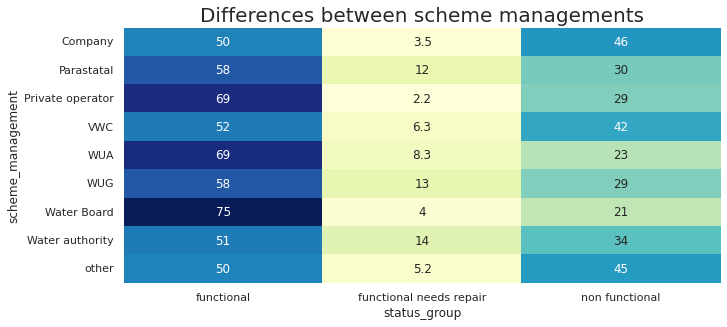

In [185]:
# To check differences between the different scheme management.
sns.set(rc={'figure.figsize':(10.7,4.7)})
ax = sns.heatmap(pd.crosstab(data.scheme_management, data.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between scheme managements', fontsize = 20) 

plt.show()

In [186]:
data.scheme_name.value_counts()

K                           682
None                        644
Borehole                    546
Chalinze wate               405
M                           400
                           ... 
Center                        1
Mpin                          1
Thobias Main Branch line      1
olmolog water                 1
Ketumbeine water project      1
Name: scheme_name, Length: 2696, dtype: int64

Column 'scheme_name'

In [187]:
data = data.drop('scheme_name', axis=1) # too many values
test_data = test_data.drop('scheme_name', axis=1)
categorical_columns.remove('scheme_name')

In [188]:
data.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

Column 'permit'

In [189]:
#Filling missing values with word "Unknown"
data.permit = data.permit.fillna('Unknown')
test_data.permit = test_data.permit.fillna('Unknown')
dummy_columns.append('permit')
data.permit.value_counts()

True       38852
False      17492
Unknown     3056
Name: permit, dtype: int64

In [190]:
data.apply(lambda x: sum(x.isnull()))

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
s

In [191]:
# preparing data in categorical columns (dtype == 'object')
data[categorical_columns].apply(lambda x: len(x.unique()))

date_recorded              356
funder                       9
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management            9
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [192]:
data.date_recorded.describe()

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object

Date converting

In [193]:
data.date_recorded = pd.to_datetime(data.date_recorded)
test_data.date_recorded = pd.to_datetime(test_data.date_recorded)
data.date_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [194]:
data.days_recorded =  pd.datetime(2013, 12, 3) - pd.to_datetime(data.date_recorded)
data['days_since_recorded'] = data.days_recorded.astype('timedelta64[D]').astype(int)
test_data.days_recorded =  pd.datetime(2013, 12, 3) - pd.to_datetime(data.date_recorded)
test_data['days_since_recorded'] = test_data.days_recorded.astype('timedelta64[D]').astype(int)
data.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,days_since_recorded
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,other,1390,other,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,995
8776,0.0,2013-03-06,other,1399,other,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,2,Serengeti,Natta,280,Unknown,GeoData Consultants Ltd,other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,272
34310,25.0,2013-02-25,other,686,other,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,281


In [195]:
data.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

Column 'wpt_name'

In [196]:
data.wpt_name.value_counts()

none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
                   ... 
Kwa Komuyangiro       1
Keisyong'O            1
Kwa Issa Hamisi       1
Kwa Kiseto            1
Kwamatola             1
Name: wpt_name, Length: 37400, dtype: int64

In [197]:
data = data.drop('wpt_name', axis=1)
test_data = test_data.drop('wpt_name', axis=1)
categorical_columns.remove('wpt_name')

In [198]:
data.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

Column 'basin'

In [199]:
dummy_columns.append('basin')
pd.crosstab(data.basin, data.status_group)

status_group,functional,functional needs repair,non functional
basin,,,
Internal,4482,557,2746
Lake Nyasa,3324,250,1511
Lake Rukwa,1000,270,1184
Lake Tanganyika,3107,742,2583
Lake Victoria,5100,989,4159
Pangani,5372,477,3091
Rufiji,5068,437,2471
Ruvuma / Southern Coast,1670,326,2497
Wami / Ruvu,3136,269,2582


In [200]:
data.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

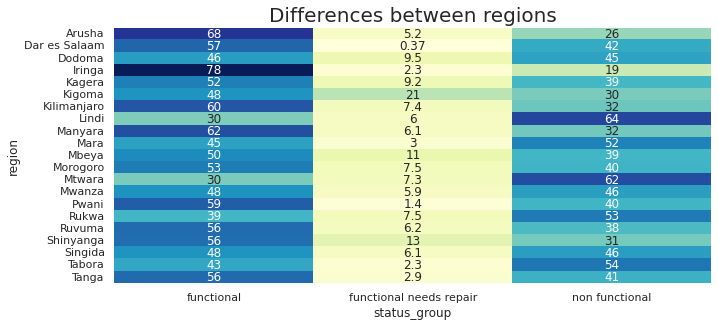

In [201]:
sns.set(rc={'figure.figsize':(10.7,4.7)})
ax = sns.heatmap(pd.crosstab(data.region, data.status_group).apply(lambda r: round(((r/r.sum()) * 100), 3), axis=1),
            cmap="YlGnBu", annot=True, cbar=False)

plt.title('Differences between regions', fontsize = 20) 

plt.show()

Deleting some columns

In [202]:
for el in ['region', 'lga', 'ward']:
  data[el].value_counts()

In [203]:
data = data.drop(['region', 'lga', 'ward'], axis=1)
test_data = test_data.drop(['region', 'lga', 'ward'], axis=1)
for el in ['region', 'lga', 'ward']:
  categorical_columns.remove(el)

In [204]:
data.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [205]:
data = data.drop('recorded_by', axis=1) # this columns has same values
test_data = test_data.drop('recorded_by', axis=1)
categorical_columns.remove('recorded_by')

In [206]:
data.extraction_type_class.describe()

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object

In [207]:
# extraction_type, extraction_type_group and extraction_type_class appear to contain very similar
# data. We'll drop the first two and keep the last one.

data = data.drop(['extraction_type', 'extraction_type_group'], axis=1)
test_data = test_data.drop(['extraction_type', 'extraction_type_group'], axis=1)
for el in ['extraction_type', 'extraction_type_group']:
  categorical_columns.remove(el)

dummy_columns.append('extraction_type_class')

In [208]:
data.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [209]:
data = data.drop(['management'], axis=1)
test_data = test_data.drop(['management'], axis=1)
categorical_columns.remove('management')

In [210]:
data.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [211]:
dummy_columns.append('management_group')

In [212]:
data.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [213]:
data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [214]:
data = data.drop('payment_type', axis=1)
test_data = test_data.drop('payment_type', axis=1)
dummy_columns.append('payment')
categorical_columns.remove('payment_type')

In [215]:
data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [216]:
data.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [217]:
data = data.drop('quality_group', 1)
test_data = test_data.drop('quality_group', 1)
categorical_columns.remove('quality_group')
dummy_columns.append('water_quality')

In [218]:
data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [219]:
data.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [220]:
data = data.drop('quantity_group', 1)
test_data = test_data.drop('quantity_group', 1)
categorical_columns.remove('quantity_group')
dummy_columns.append('quantity')

In [221]:
data.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [222]:
data.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [223]:
data.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [224]:
data = data.drop('source', 1)
test_data = test_data.drop('source', 1)
categorical_columns.remove('source')
dummy_columns.append('source_type')
dummy_columns.append('source_class')

In [225]:
data.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [226]:
data.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [227]:
data = data.drop('waterpoint_type_group', 1)
test_data = test_data.drop('waterpoint_type_group', 1)
categorical_columns.remove('waterpoint_type_group')
dummy_columns.append('waterpoint_type')

## Perform an exploratory analysis of the data via visualization with Seaborn

Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make a machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options for target variables, you can select some of them after this step with a couple of sentences explaining your choice. (6 points).

In [63]:
!pip install geopandas

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


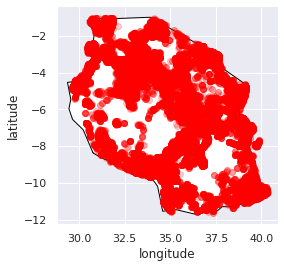

In [228]:
import geopandas as gpd
import matplotlib

from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(data[data.longitude>10]['longitude'], data[data.longitude>10]['latitude'])]
geo_df = gpd.GeoDataFrame(data[data.longitude>10], crs=loc_crs, geometry=loc_geom)

fig, gax = plt.subplots(figsize=(4,4))
world.query("name == 'Tanzania'").plot(ax=gax, edgecolor='black',color='white')
geo_df.plot(ax=gax, color='red', alpha = 0.2)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


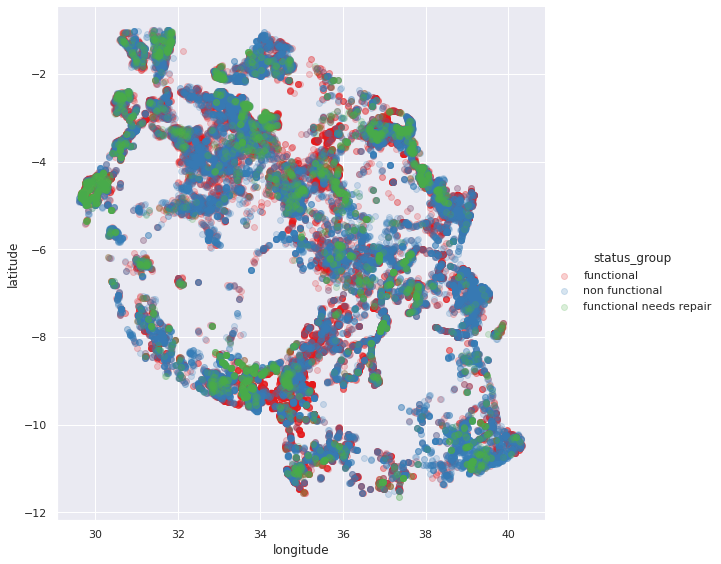

In [229]:
sns.lmplot(x='longitude', y='latitude', hue='status_group', data=data[data.longitude>10], fit_reg=False, size=8, 
           scatter_kws={'alpha':0.2}, palette="Set1")

Dropping here columns again

In [230]:
data = data.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'num_private',], axis=1)
test_data = test_data.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'num_private'], axis=1)
for el in ['longitude', 'num_private', 'gps_height', 'district_code', 'latitude', 'region_code']:
  numerical_columns.remove(el)

In [231]:
data.head(3)

,amount_tsh,date_recorded,funder,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,days_since_recorded
id,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,other,other,Lake Nyasa,109,True,VWC,False,1999,gravity,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,995
8776,0.0,2013-03-06,other,other,Lake Victoria,280,Unknown,other,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,272
34310,25.0,2013-02-25,other,other,Pangani,250,True,VWC,True,2009,gravity,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,281


In [232]:
# checking data in categorical columns (dtype == 'object')
data[categorical_columns].apply(lambda x: len(x.unique()))

date_recorded            356
funder                     9
installer                  6
basin                      9
public_meeting             3
scheme_management          9
permit                     3
extraction_type_class      7
management_group           5
payment                    7
water_quality              8
quantity                   5
source_type                7
source_class               3
waterpoint_type            7
status_group               3
dtype: int64

In [234]:
data.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [235]:
def reduce_construction(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    

In [236]:
data.construction_year = data.apply(lambda x: reduce_construction(x), axis=1)
test_data.construction_year = test_data.apply(lambda x: reduce_construction(x), axis=1)
dummy_columns.append('construction_year')

In [238]:
data.construction_year.value_counts()

unknown    20709
00s        15330
90s         7678
80s         5578
10s         5161
70s         4406
60s          538
Name: construction_year, dtype: int64

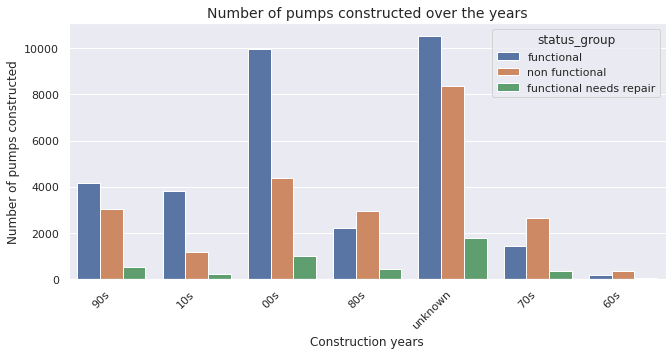

In [239]:
sns.set(rc={'figure.figsize':(10.7,4.7)})

sns.countplot(x=data["construction_year"],hue=data["status_group"])
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("Number of pumps constructed over the years", fontsize=14)
plt.xlabel("Construction years", fontsize=12)
plt.ylabel("Number of pumps constructed", fontsize=12)
plt.show()

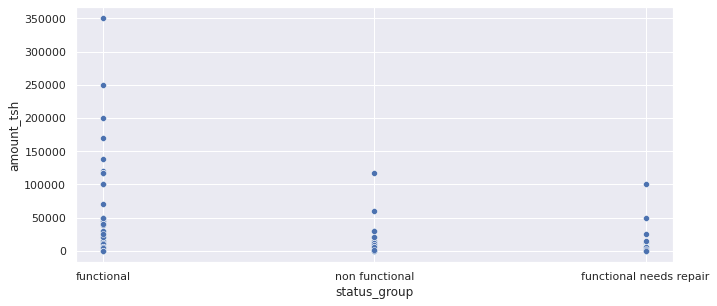

In [240]:
sns.set(rc={'figure.figsize':(10.7,4.7)})
sns.scatterplot(y=data["amount_tsh"],x=data["status_group"])


In [241]:
data.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [242]:
numerical_columns.remove('construction_year')

In [243]:
sns.set(rc={'figure.figsize':(10.7,4.7)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


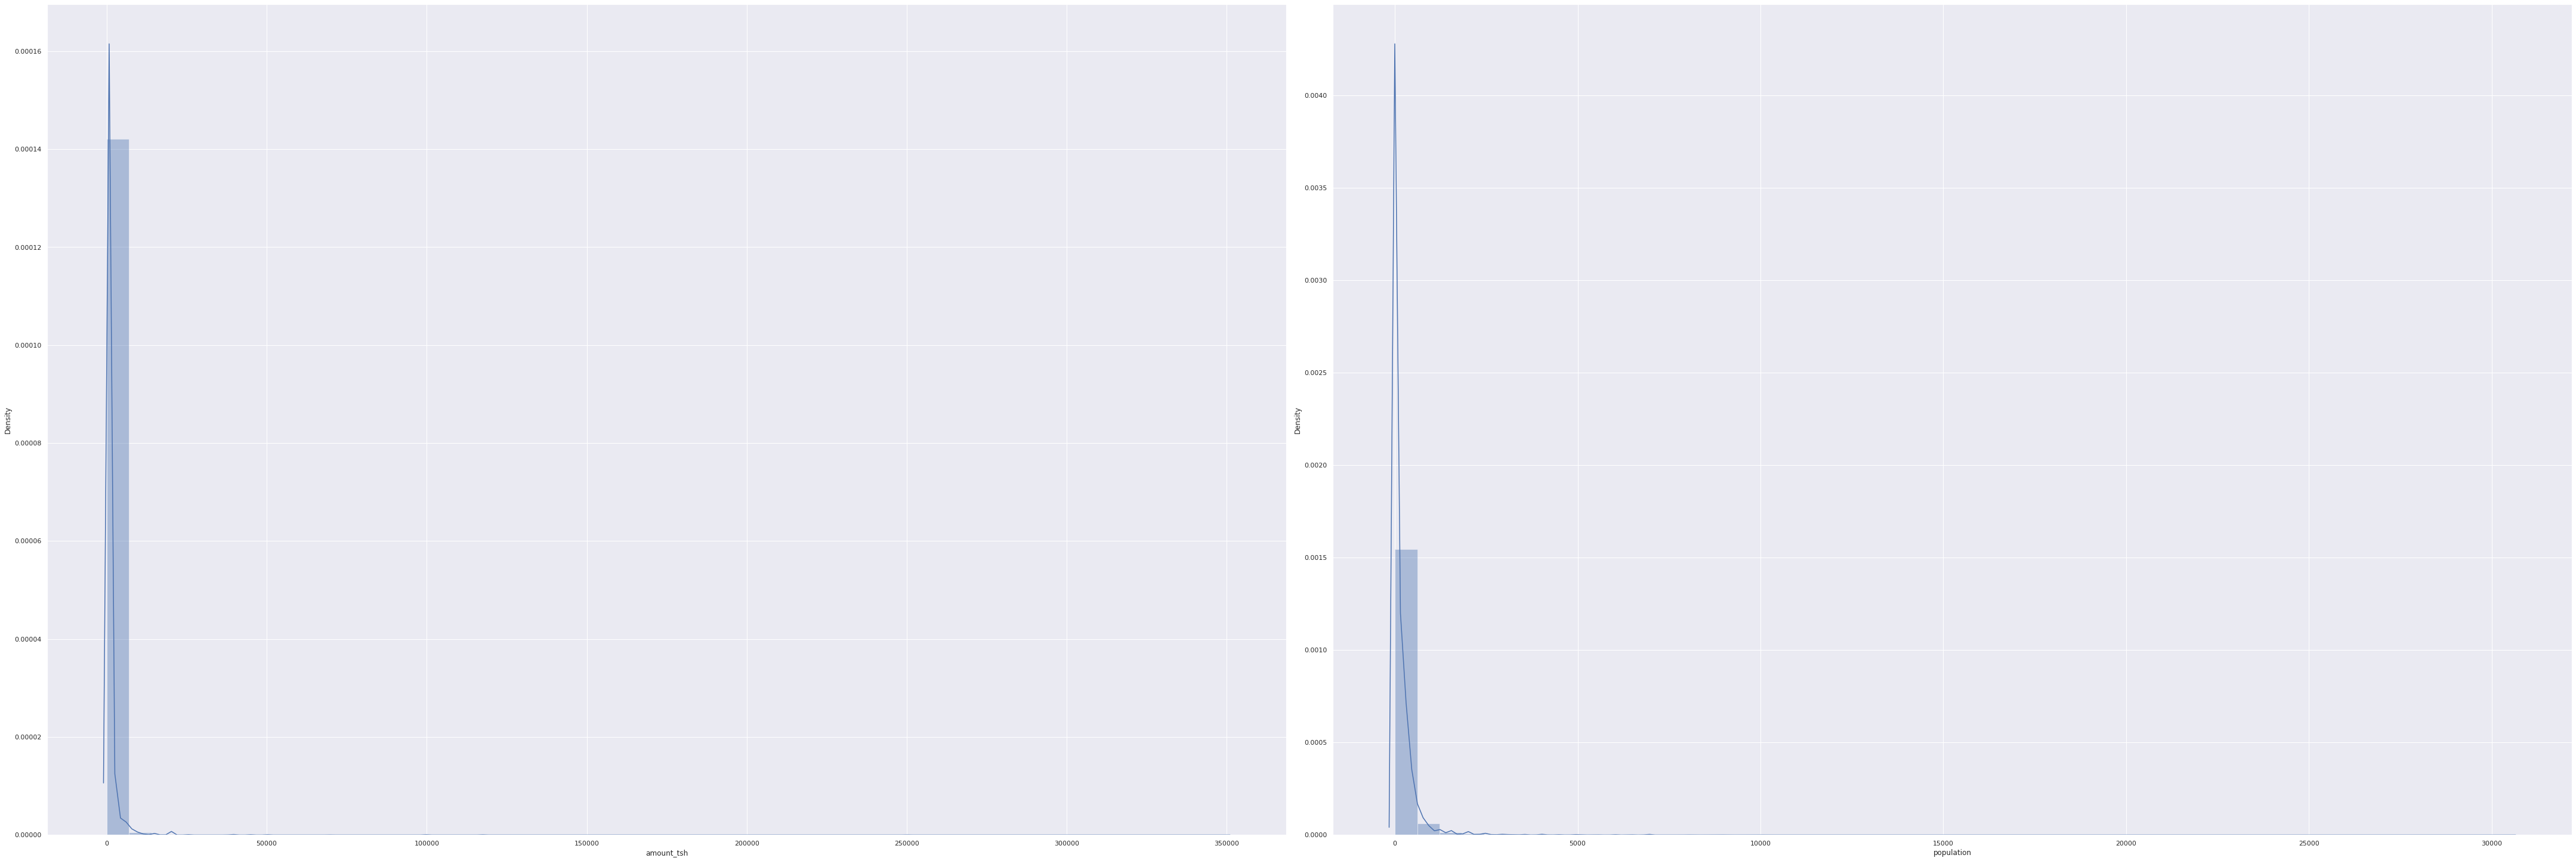

In [244]:
fig = plt.figure(figsize=(120,180))
sns.distributions._has_statsmodels=False
for i in range(len(numerical_columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(data[numerical_columns].iloc[:,i].dropna())
    plt.xlabel(numerical_columns[i])
plt.tight_layout()
plt.show()

In [245]:
data = data.drop('date_recorded', axis=1)
test_data = test_data.drop('date_recorded', axis=1)

Our dummy columns

In [246]:
dummy_columns

['funder',
 'installer',
 'public_meeting',
 'scheme_management',
 'permit',
 'basin',
 'extraction_type_class',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type',
 'construction_year']

In [247]:
data = pd.get_dummies(data, columns = dummy_columns)
test_data = pd.get_dummies(test_data, columns = dummy_columns)

## Cross-validation procedure

Build a proper cross-validation procedure; select an appropriate measure of quality (the selection of both things should be motivated by your data). Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction (9 points).

In [248]:
from sklearn.model_selection import train_test_split
target, features = data['status_group'], data.drop(['status_group'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.8, )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


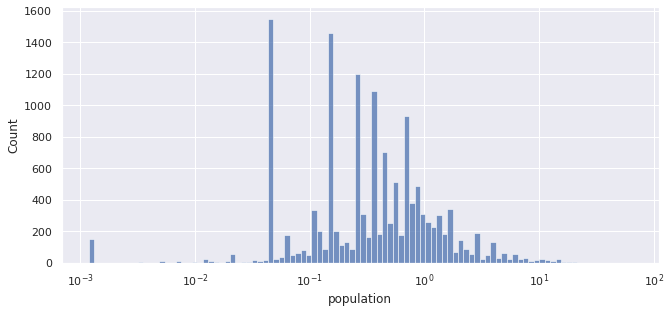

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[['population']])
X_train['population'] = scaler.transform(X_train[['population']])

scaler = StandardScaler()
scaler.fit(X_val[['population']])
X_val['population'] = scaler.transform(X_val[['population']])
sns.set(rc={'figure.figsize':(10.7,4.7)})
sns.histplot(X_train.population, bins = 100, log_scale=True)

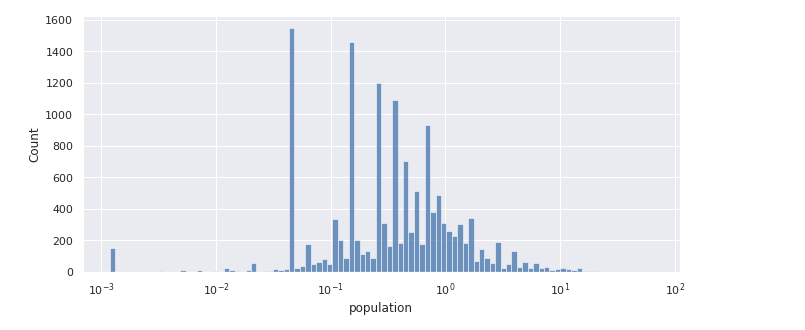

In [250]:
y_train.value_counts()

functional                 25823
non functional             18228
functional needs repair     3469
Name: status_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


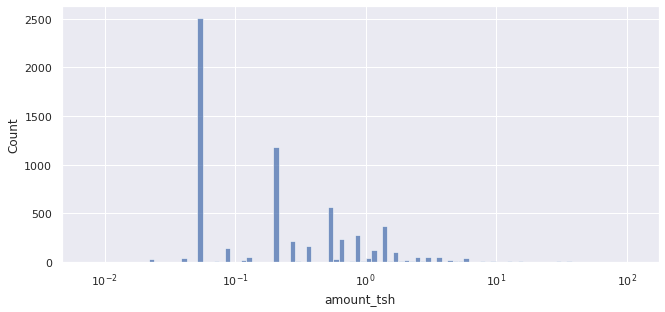

In [251]:
scaler = StandardScaler()
scaler.fit(X_train[['amount_tsh']])
X_train['amount_tsh'] = scaler.transform(X_train[['amount_tsh']])

scaler = StandardScaler()
scaler.fit(X_val[['amount_tsh']])
X_val['amount_tsh'] = scaler.transform(X_val[['amount_tsh']])
sns.set(rc={'figure.figsize':(10.7,4.7)})
sns.histplot(X_train.amount_tsh, bins = 100, log_scale=True)

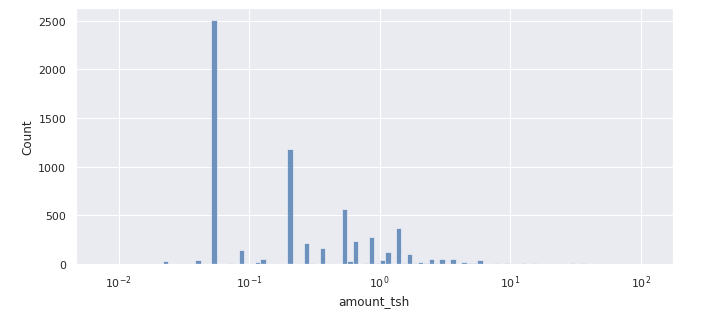

In [252]:
data.to_csv('file_train_for_models.csv', index=False)

In [253]:
(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

((47520, 98), (47520,), (11880, 98), (11880,))

***Logistic Regression***

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score

logreg = LogisticRegression(max_iter=5000)
print(logreg)

logreg_model = logreg.fit(X_train, y_train)

val_acc = logreg_model.score(X_val,y_val)
print('val_acc', val_acc)
scores = logreg_model.score(X_train,y_train)
print('scores', scores)

pred = logreg_model.predict(X_val)
print('pred', pred)

f1 = f1_score(y_val, pred, average='weighted')
print('f1-score -weighted', round(f1, 3))

ytrain=y_train.values
print('ytrain', ytrain)
pred = logreg_model.predict(X_train)
cnf_matrix = metrics.confusion_matrix(ytrain,pred)
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
val_acc 0.7320707070707071
scores 0.7331649831649831
pred ['functional' 'functional' 'functional' ... 'functional' 'functional'
 'non functional']
f1-score -weighted 0.704
ytrain ['functional' 'functional' 'functional needs repair' ... 'functional'
 'functional' 'functional']


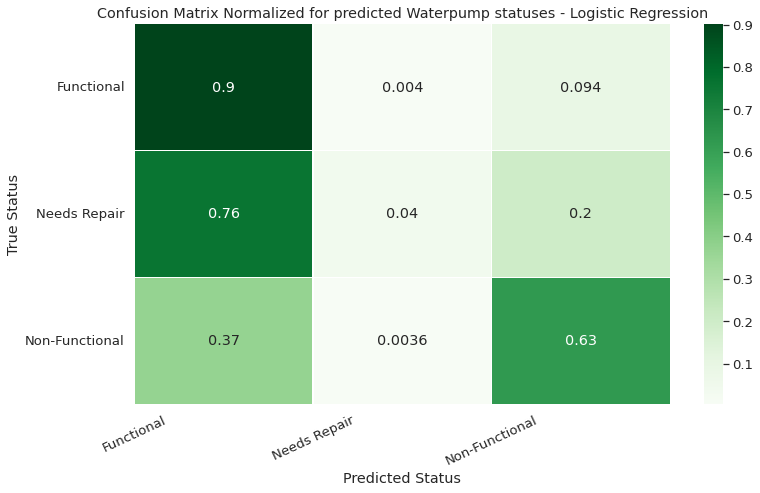

In [88]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)


class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses - Logistic Regression')
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, pred))

                         precision    recall  f1-score   support

             functional       0.71      0.90      0.80     25763
functional needs repair       0.45      0.04      0.07      3468
         non functional       0.79      0.63      0.70     18289

               accuracy                           0.73     47520
              macro avg       0.65      0.52      0.52     47520
           weighted avg       0.72      0.73      0.71     47520



***k-neighbors classifier***

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

clf = KNeighborsClassifier()
print(clf)

knn_model = clf.fit(X_train, y_train)

val_acc = knn_model.score(X_val,y_val)
print('val_acc', val_acc)
scores = knn_model.score(X_train,y_train)
print('scores', scores)

pred = knn_model.predict(X_val)
print('pred', pred)


f1 = f1_score(y_val, pred, average='weighted')
print('f1-score -weighted', round(f1, 3))

ytrain=y_train.values
print('ytrain', ytrain)
pred = knn_model.predict(X_train)
cnf_matrix = metrics.confusion_matrix(ytrain,pred)
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
val_acc 0.759090909090909
scores 0.8263678451178451
pred ['non functional' 'non functional' 'non functional' ... 'non functional'
 'non functional' 'non functional']
f1-score -weighted 0.751
ytrain ['functional' 'functional' 'functional needs repair' ... 'functional'
 'functional' 'functional']


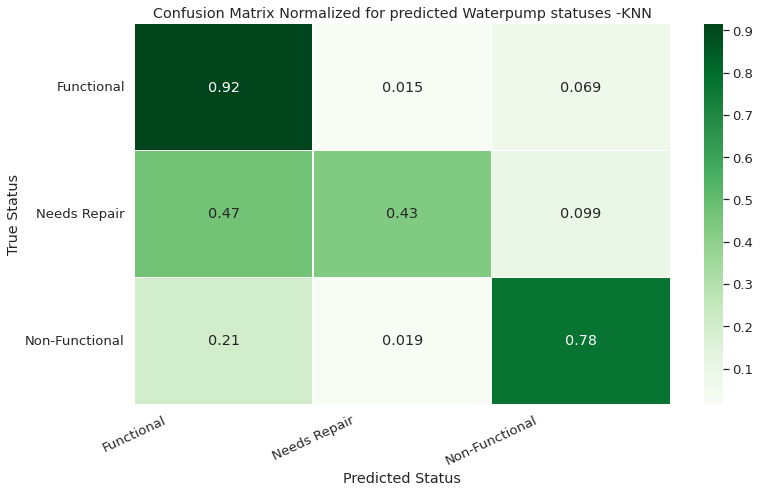

In [91]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses -KNN')
plt.show()

In [92]:
print(classification_report(ytrain, pred))

                         precision    recall  f1-score   support

             functional       0.81      0.92      0.86     25763
functional needs repair       0.67      0.43      0.52      3468
         non functional       0.87      0.78      0.82     18289

               accuracy                           0.83     47520
              macro avg       0.78      0.71      0.74     47520
           weighted avg       0.82      0.83      0.82     47520



***random forest classifier***

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

forest = RandomForestClassifier()
print(forest)

forest_model = forest.fit(X_train, y_train)

val_acc = forest_model.score(X_val,y_val)
print('val_acc', val_acc)
scores = forest_model.score(X_train,y_train)
print('scores', scores)

pred = forest_model.predict(X_val)
print('pred', pred)


f1 = f1_score(y_val, pred, average='weighted')
print('f1-score -weighted', round(f1, 3))

ytrain=y_train.values
print('ytrain', ytrain)
pred = forest_model.predict(X_train)
cnf_matrix = metrics.confusion_matrix(ytrain,pred)
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
val_acc 0.7846801346801346
scores 0.9423190235690235
pred ['non functional' 'non functional' 'functional' ... 'non functional'
 'non functional' 'non functional']
f1-score -weighted 0.779
ytrain ['functional' 'functional' 'functional needs repair' ... 'functional'
 'functional' 'functional']


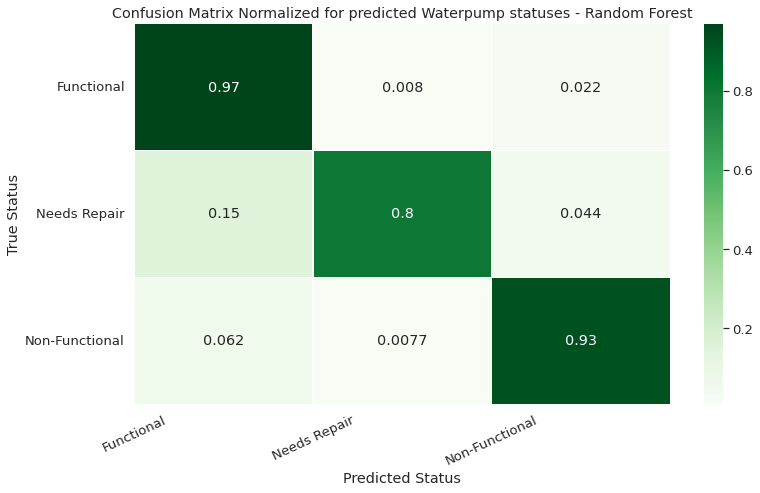

In [94]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses - Random Forest')
plt.show()

In [95]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, pred))

                         precision    recall  f1-score   support

             functional       0.94      0.97      0.95     25763
functional needs repair       0.89      0.80      0.84      3468
         non functional       0.96      0.93      0.94     18289

               accuracy                           0.94     47520
              macro avg       0.93      0.90      0.91     47520
           weighted avg       0.94      0.94      0.94     47520



***Gradient Boosting*** 

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

xgb = GradientBoostingClassifier()
print(xgb)

xgb_model = xgb.fit(X_train,y_train)
val_acc = xgb_model.score(X_val,y_val)
print('val_acc', val_acc)
scores = xgb_model.score(X_train,y_train)
print('scores', scores)

pred = xgb_model.predict(X_val)
print('pred', pred)

f1 = f1_score(y_val, pred, average='weighted')
print('f1-score -weighted', round(f1, 3))

ytrain=y_train.values
print('ytrain', ytrain)
pred = xgb_model.predict(X_train)
cnf_matrix = metrics.confusion_matrix(ytrain,pred)
cnf_matrix = cnf_matrix.astype('float')  / cnf_matrix.sum(axis=1)[:, np.newaxis]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
val_acc 0.7496632996632997
scores 0.752483164983165
pred ['functional' 'functional' 'functional' ... 'functional' 'functional'
 'non functional']
f1-score -weighted 0.725
ytrain ['functional' 'functional' 'functional needs repair' ... 'functional'
 'functional' 'functional']


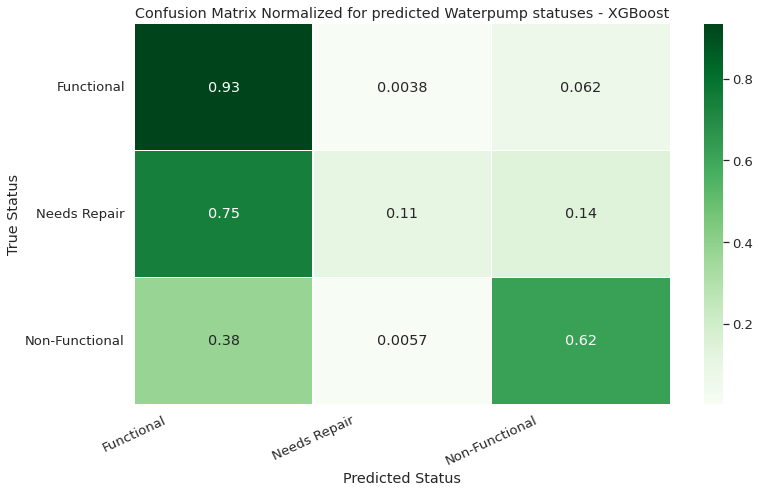

In [97]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(cnf_matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Functional', 'Needs Repair', 'Non-Functional']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Status')
plt.ylabel('True Status')
plt.title('Confusion Matrix Normalized for predicted Waterpump statuses - XGBoost')
plt.show()

In [98]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, pred))

                         precision    recall  f1-score   support

             functional       0.72      0.93      0.81     25763
functional needs repair       0.65      0.11      0.19      3468
         non functional       0.84      0.62      0.71     18289

               accuracy                           0.75     47520
              macro avg       0.74      0.55      0.57     47520
           weighted avg       0.76      0.75      0.73     47520



## Result analysis

The goal of this project was to predict whether or not a pump worked or required repairing based on data describing the pump, the well, its surroundings, who was managing it, and the date.

We have started with an Exploratory Data Analysis. Dividing the data into numerical and categorical according to their typology. We have then identified the missing values ​​to deal with them in the later preprocessing phase, looked for outliers, and analyzed given data.

In the next step we have done the cleaning and preprocessing of the data. We started by removing attributes that contained similar information to avoid multicollinearity. We also have treated the missing data, made ordinal type coding for those that required it and get_dummies for the others. Finally, we have created new variables that better define the target.



Finally, various models have been checked and the results shown in a graph, obtaining that the best ones are:

- Optimal Boosting Classifier - 74.97 -> 76.8

- Random Forest - 76.32 -> 78.00

- Logistic Regression - 73.21

- k-neighbors Classifier - 75.91 ->  76.70

Here we would like to introduce more interesting facts, that we have got a chance to find!


#### Even new wells in Tanzania are badly constructed

From the newests wells , which were constructed in 2013 and recorded in January 2013 (less, than a month later) already 50% were non functional

In [99]:
from datetime import datetime

dates = origin_data.construction_year
latest = max([(dates.index[i], dates.values[i]) for i in range(len(dates))], key=lambda d: d[1])[1]
newests = origin_data[origin_data['construction_year'] == latest]
newests['recorded_datetime'] = pd.to_datetime(newests.date_recorded)
newests[newests['recorded_datetime'].map(lambda d: d.month == 1 and d.year == latest)]['status_group'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


non functional    6
functional        6
Name: status_group, dtype: int64

But only one of the wells, which were built in 2013 was marked as needs repair, but already in February.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0c001ad0>,
      dtype=object)

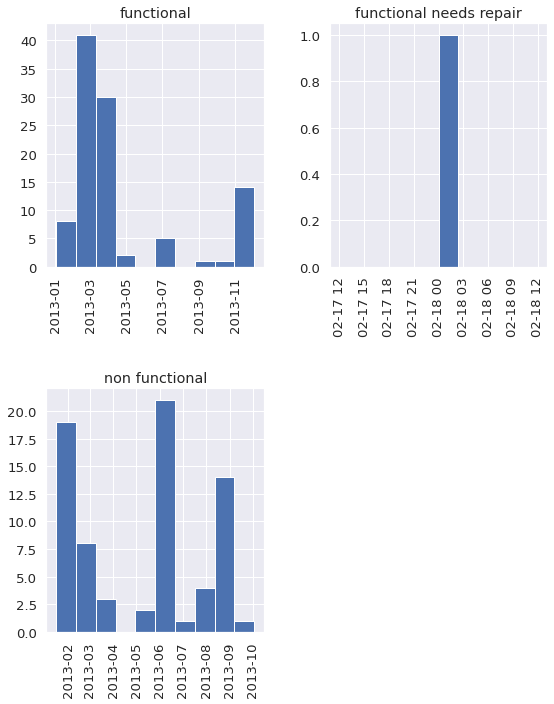

In [100]:
def numpy_to_datetime(np_datetime):
  return datetime.utcfromtimestamp((np_datetime - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's'))

newests['recorded_datetime'].hist(by=data['status_group'])
# newests[newests['status_group'] == 'functional needs repair']

#### Recording commission favourite months

Almost 50% of the recordings were made on February or March, because there is the beginning of the rainy seasons in Tanzania at this time and low risk of being left without water.
Meanwhile the only region of Tanzania, that was visited contrariwise on June and Jule is Mwanza. That's because Mwanza is the only seaport of Tanzania.

In [101]:
origin_data['recorded_datetime'] = pd.to_datetime(origin_data.date_recorded)
origin_data['month'] = origin_data['recorded_datetime'].map(lambda d: d.month)
origin_data['month'].value_counts() * 100 / sum(origin_data['month'].value_counts())

3     30.195286
2     20.878788
7     11.663300
1     10.696970
10     9.202020
4      6.683502
8      5.663300
11     2.271044
12     1.045455
6      0.582492
5      0.565657
9      0.552189
Name: month, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0c76ec50>,
      dtype=object)

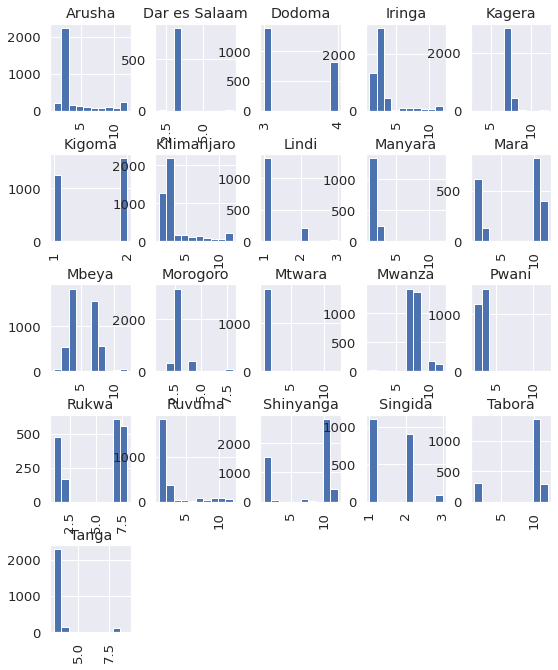

In [102]:
origin_data['recorded_datetime'] = pd.to_datetime(origin_data.date_recorded)
origin_data['month'] = origin_data['recorded_datetime'].map(lambda d: d.month)
origin_data['month'].hist(by=origin_data['region'])

#### Top-5 reliable cities in term of constructing good wells

- Iringa
- Arusha
- Manyara
- Kilimanjaro
- Pwani

In [103]:
origin_data['is_functional'] = origin_data['status_group'] == 'functional'
origin_data['not_functional'] = origin_data['is_functional'] != 1
group_by_region = origin_data.groupby('region').sum()
functional_to_non_functional = group_by_region['is_functional'] / group_by_region['not_functional']
sorted([(functional_to_non_functional.index[i], functional_to_non_functional.values[i]) for i in range(len(functional_to_non_functional))], key=lambda s: s[1], reverse=True)[:5]

[('Iringa', 3.5915004336513445),
 ('Arusha', 2.172348484848485),
 ('Manyara', 1.6560402684563758),
 ('Kilimanjaro', 1.5181138585393905),
 ('Pwani', 1.4420759962928638)]

#### There're 1812 raws of hardly damaged data in dataset

data has no amount_tsh, gps_height, latitude and longitude, num_private, population and construction_year

In [104]:
origin_data[origin_data['longitude'] < 10].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,month
count,1812.0,1812.0,1812.0,1.812000e+03,1812.0,1812.000000,1812.000000,1812.0,1812.0,1812.000000
mean,0.0,0.0,0.0,-2.000000e-08,0.0,17.820088,2.497241,0.0,0.0,5.613687
std,0.0,0.0,0.0,3.541310e-22,0.0,1.023562,2.157389,0.0,0.0,3.795256
min,0.0,0.0,0.0,-2.000000e-08,0.0,11.000000,1.000000,0.0,0.0,1.000000
25%,0.0,0.0,0.0,-2.000000e-08,0.0,17.000000,1.000000,0.0,0.0,2.000000
50%,0.0,0.0,0.0,-2.000000e-08,0.0,17.000000,1.000000,0.0,0.0,7.000000
75%,0.0,0.0,0.0,-2.000000e-08,0.0,19.000000,6.000000,0.0,0.0,10.000000
max,0.0,0.0,0.0,-2.000000e-08,0.0,19.000000,6.000000,0.0,0.0,12.000000


## Tuning Hyperparameter of Classifier

In [112]:
optimal_logreg = LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
optimal_logreg.fit(X_train, y_train)
y_pred = optimal_logreg.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted')
round(f1, 3) #0.7321

0.704

In [106]:
optimal_knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')
optimal_knn_clf.fit(X_train, y_train)
y_pred = optimal_knn_clf.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted')
round(f1, 3) #0.7591

0.767

In [107]:
from sklearn.ensemble import RandomForestClassifier
optimal_rnd_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
optimal_rnd_forest.fit(X_train, y_train)
y_pred = optimal_rnd_forest.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted')
round(f1, 3)

0.78

In [110]:
optimal_gboost = GradientBoostingClassifier(max_depth=10,
                                 min_samples_split = 500,
                                 min_samples_leaf=50,
                                 max_features=1.0,
                                 subsample=0.8).fit(X_train, y_train)
optimal_gboost.fit(X_train, y_train)
y_pred = optimal_gboost.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted')
round(f1, 3) #0.7496

0.768

# Thank you for your attention!

In [109]:
from sklearn.model_selection import GridSearchCV

forreg = RandomForestClassifier()
param_grid = {'n_estimators': [500],
    'max_features': [ 'sqrt', 'log2'],
   }
rforest_cv = GridSearchCV(forreg, param_grid, cv=5, scoring='f1')
rforest_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",rforest_cv.best_params_)
print('best estimator', rforest_cv.best_estimator_)
print("accuracy :",rforest_cv.best_score_)
y_pred = rforest_cv.predict(X_val)
f1 = f1_score(y_val, y_pred)
round(f1, 3)

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
param_grid = {'C': [1.e+00, 1.e+01, 1.e+02], "penalty":["l2"] }
logreg_cv = GridSearchCV(logreg, param_grid, cv=5,scoring='f1_weighted')
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print('best estimator', logreg_cv.best_estimator_)
print("accuracy :",logreg_cv.best_score_)

pred = logreg_cv.predict(X_val)
print('pred', pred)

f1 = f1_score(y_val, pred, average='weigthed')
print('f1-score', round(f1, 3))

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.075, 0.7],
          'max_depth': [13, 14],
          'min_samples_leaf': [15, 16],
          'max_features': [1.0],
          'n_estimators': [100, 200]} 


clf = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='f1_weighted')

clf.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print('best estimator', clf.best_estimator_)
print("accuracy :",clf.best_score_)

y_pred = clf.predict(X_val)
f1 = f1_score(y_val, y_pred)
round(f1, 3)